# Data loading and preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import json
from collections import defaultdict
import random # Importing the random module

In [3]:
#politifact_news_file
news_file = '/content/drive/MyDrive/Data/Politifact/politifact.csv'

#trainest
trainset = '/content/drive/MyDrive/Data/Politifact/trainset.csv'

#testset
testset = '/content/drive/MyDrive/Data/Politifact/testset.csv'

In [4]:
import pandas as pd
df= pd.read_csv(news_file)
df.head(3)

,news_id,news_title,news_text,source,news_label,tweet_id,tweet_created_time,tweet_text,user_id,user_name,...,value_openness_to_change_significant,value_self_enhancement,value_self_enhancement_raw,value_self_enhancement_significant,value_self_transcendence,value_self_transcendence_raw,value_self_transcendence_significant,rating,user_id_new,news_id_new
0,politifact15096,Keanu on Trump travel ban: ‘just terrible’,At the Los Angeles premiere of their latest fi...,https://www.apnews.com,fake,826667186823503874,Wed Feb 01 05:43:10 +0000 2017,Keanu on Trump travel ban: ‘just terrible’ htt...,2908313571,News247WorldPress,...,True,0.087683,0.646877,True,0.001103,0.7831,True,1,1019,458
1,politifact12486,CQ.com,Need help? Contact the CQ Hotline at (800) 678...,http://www.cq.com,real,1053122000468762624,Fri Oct 19 03:13:45 +0000 2018,Vladimir Putin gave his annual foreign policy ...,2908313571,News247WorldPress,...,True,0.087683,0.646877,True,0.001103,0.7831,True,1,1019,272
2,politifact683,NaN,NaN,http://www.cbsnews.com,real,1014571360461312000,Wed Jul 04 18:07:16 +0000 2018,Despite saying that he expected to have a deci...,2908313571,News247WorldPress,...,True,0.087683,0.646877,True,0.001103,0.7831,True,1,1019,199


In [5]:
df['news_label'].value_counts()

,count
news_label,
fake,11442
real,8823


In [6]:
df.columns

Index(['news_id', 'news_title', 'news_text', 'source', 'news_label',
       'tweet_id', 'tweet_created_time', 'tweet_text', 'user_id', 'user_name',
       ...
       'value_openness_to_change_significant', 'value_self_enhancement',
       'value_self_enhancement_raw', 'value_self_enhancement_significant',
       'value_self_transcendence', 'value_self_transcendence_raw',
       'value_self_transcendence_significant', 'rating', 'user_id_new',
       'news_id_new'],
      dtype='object', length=213)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20265 entries, 0 to 20264
Columns: 213 entries, news_id to news_id_new
dtypes: bool(52), float64(140), int64(7), object(14)
memory usage: 25.9+ MB


In [8]:
df['user_id'].nunique()

1028

In [9]:
df['news_id'].nunique()

542

## Extracting relevant news and user information

In [10]:
df_news_user=df[['news_id','news_id_new','news_title','news_text','news_label','user_id','user_id_new']]
df_news_user.head()

,news_id,news_id_new,news_title,news_text,news_label,user_id,user_id_new
0,politifact15096,458,Keanu on Trump travel ban: ‘just terrible’,At the Los Angeles premiere of their latest fi...,fake,2908313571,1019
1,politifact12486,272,CQ.com,Need help? Contact the CQ Hotline at (800) 678...,real,2908313571,1019
2,politifact683,199,NaN,NaN,real,2908313571,1019
3,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019
4,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019


In [11]:
df_news_user.shape

(20265, 7)

In [12]:
df_news_user['news_id_new'].nunique()

542

In [13]:
df_news_user.rename(columns={'news_id':'newsid'}, inplace=True)

/tmp/ipython-input-13-3586172709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_user.rename(columns={'news_id':'newsid'}, inplace=True)


In [14]:
df_news_user.rename(columns={'news_id_new':'news_id'}, inplace=True)

/tmp/ipython-input-14-4080120520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_user.rename(columns={'news_id_new':'news_id'}, inplace=True)


In [15]:
df_news_user.rename(columns={'user_id':'userid'}, inplace=True)

/tmp/ipython-input-15-1808183020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_user.rename(columns={'user_id':'userid'}, inplace=True)


In [16]:
df_news_user.rename(columns={'user_id_new':'user_id'}, inplace=True)

/tmp/ipython-input-16-2906277305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_user.rename(columns={'user_id_new':'user_id'}, inplace=True)


In [17]:
df_news_user.head()

,newsid,news_id,news_title,news_text,news_label,userid,user_id
0,politifact15096,458,Keanu on Trump travel ban: ‘just terrible’,At the Los Angeles premiere of their latest fi...,fake,2908313571,1019
1,politifact12486,272,CQ.com,Need help? Contact the CQ Hotline at (800) 678...,real,2908313571,1019
2,politifact683,199,NaN,NaN,real,2908313571,1019
3,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019
4,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019


## Extracting 542 unique news articles

In [18]:
# Extract unique news items by dropping duplicates based on 'news_id'
news_df = df_news_user.drop_duplicates(subset='news_id')


print(news_df.shape)

news_df.head()

(542, 7)


,newsid,news_id,news_title,news_text,news_label,userid,user_id
0,politifact15096,458,Keanu on Trump travel ban: ‘just terrible’,At the Los Angeles premiere of their latest fi...,fake,2908313571,1019
1,politifact12486,272,CQ.com,Need help? Contact the CQ Hotline at (800) 678...,real,2908313571,1019
2,politifact683,199,NaN,NaN,real,2908313571,1019
3,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019
5,politifact13136,120,The first Trump-Clinton presidential debate tr...,"To see an annotation, click or tap the highlig...",real,2908313571,1019


The above 'news_df' dataframe has all the news data.

In [19]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 19758
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   newsid      542 non-null    object
 1   news_id     542 non-null    int64 
 2   news_title  516 non-null    object
 3   news_text   496 non-null    object
 4   news_label  542 non-null    object
 5   userid      542 non-null    int64 
 6   user_id     542 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 33.9+ KB


## trainset and testset

In [20]:
trainset= pd.read_csv(trainset)

In [21]:
trainset

,user,item,rating
0,1,288,1
1,1,353,1
2,1,435,1
3,1,184,1
4,1,416,1
...,...,...,...
19232,1028,303,1
19233,1028,234,1
19234,1028,238,1
19235,1028,215,1


In [22]:
trainset.rename(columns={'user':'user_id'}, inplace=True)
trainset.rename(columns={'item':'news_id'}, inplace=True)

In [23]:
trainset

,user_id,news_id,rating
0,1,288,1
1,1,353,1
2,1,435,1
3,1,184,1
4,1,416,1
...,...,...,...
19232,1028,303,1
19233,1028,234,1
19234,1028,238,1
19235,1028,215,1


In [24]:
news_user_df = trainset.copy()
news_user_df.head(2)

,user_id,news_id,rating
0,1,288,1
1,1,353,1


In [25]:
 news_user_df["user_id"].nunique()

1028

In [26]:
testset= pd.read_csv(testset)
testset

,user,item,rating
0,1,199,1
1,2,34,1
2,3,51,1
3,4,187,1
4,5,261,1
...,...,...,...
1023,1024,380,1
1024,1025,356,1
1025,1026,272,1
1026,1027,489,1


In [27]:

testset.rename(columns={'user':'user_id'}, inplace=True)
testset.rename(columns={'item':'news_id'}, inplace=True)

In [28]:
testset

,user_id,news_id,rating
0,1,199,1
1,2,34,1
2,3,51,1
3,4,187,1
4,5,261,1
...,...,...,...
1023,1024,380,1
1024,1025,356,1
1025,1026,272,1
1026,1027,489,1


In [29]:
#trainset['user_id'].nunique()

## Extracting neigbours with labels

creating a dictionary *'user interactions'* which has each user id as key with a list of values each a dictionay with *'news_id'* and *'label'* as keys

In [30]:
labels_dict=news_df[['news_id','news_label']].set_index('news_id')['news_label'].to_dict()

In [31]:
#testing if we have for all news for user 1
n=[288,353,435,184,416,135,135,439,135,135,3,135,395,135,135,275,458,199]
for n in n:
    print(labels_dict[n])

real
real
fake
real
real
real
real
real
real
real
fake
real
real
real
real
real
fake
real


In [32]:
#testing if we have all the users
u=df['user_id_new'].unique().tolist()
u.sort()
u

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [33]:
# Create a deep copy
user_news_interactions_copy = trainset.copy()
user_news_interactions_copy.head(2)

,user_id,news_id,rating
0,1,288,1
1,1,353,1


In [34]:



user_news_interactions_copy.drop(columns=['rating'], inplace=True)

In [35]:
user_news_interactions_copy.head(2)

,user_id,news_id
0,1,288
1,1,353


In [36]:
news_df.tail(2)

,newsid,news_id,news_title,news_text,news_label,userid,user_id
19695,politifact13443,481,Families Facing Tax Increases Under Trump's Ta...,NaN,real,3074470992,580
19758,politifact7259,179,NRA President David Keene Rejects White House ...,JUDY WOODRUFF: We come back now to the gun sto...,real,14437914,804


In [37]:
user_interactions_df = user_news_interactions_copy.merge(news_df[['news_id', 'news_label']], on='news_id', how='left')
user_interactions_df.head(2)

,user_id,news_id,news_label
0,1,288,real
1,1,353,real


In [38]:
user_interactions = user_interactions_df.groupby('user_id')[['news_id', 'news_label']].apply(
    lambda x: [{'news_id': row[0], 'news_label': row[1]} for row in x.values]
).to_dict()

In [39]:
user_interactions[1]

[{'news_id': 288, 'news_label': 'real'},
 {'news_id': 353, 'news_label': 'real'},
 {'news_id': 435, 'news_label': 'fake'},
 {'news_id': 184, 'news_label': 'real'},
 {'news_id': 416, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 439, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 3, 'news_label': 'fake'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 395, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 458, 'news_label': 'fake'}]

In [40]:

user_interactions[14]

[{'news_id': 77, 'news_label': 'fake'},
 {'news_id': 91, 'news_label': 'fake'},
 {'news_id': 362, 'news_label': 'fake'},
 {'news_id': 496, 'news_label': 'fake'},
 {'news_id': 534, 'news_label': 'fake'},
 {'news_id': 467, 'news_label': 'fake'},
 {'news_id': 113, 'news_label': 'fake'},
 {'news_id': 450, 'news_label': 'fake'},
 {'news_id': 450, 'news_label': 'fake'},
 {'news_id': 426, 'news_label': 'fake'},
 {'news_id': 257, 'news_label': 'fake'},
 {'news_id': 173, 'news_label': 'fake'},
 {'news_id': 23, 'news_label': 'fake'},
 {'news_id': 92, 'news_label': 'fake'},
 {'news_id': 366, 'news_label': 'fake'},
 {'news_id': 303, 'news_label': 'fake'},
 {'news_id': 111, 'news_label': 'fake'},
 {'news_id': 44, 'news_label': 'fake'},
 {'news_id': 310, 'news_label': 'fake'},
 {'news_id': 293, 'news_label': 'fake'},
 {'news_id': 340, 'news_label': 'fake'},
 {'news_id': 293, 'news_label': 'fake'},
 {'news_id': 237, 'news_label': 'fake'},
 {'news_id': 174, 'news_label': 'fake'}]

In [41]:

user_interactions

{1: [{'news_id': 288, 'news_label': 'real'},
  {'news_id': 353, 'news_label': 'real'},
  {'news_id': 435, 'news_label': 'fake'},
  {'news_id': 184, 'news_label': 'real'},
  {'news_id': 416, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 439, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 3, 'news_label': 'fake'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 395, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 275, 'news_label': 'real'},
  {'news_id': 275, 'news_label': 'real'},
  {'news_id': 275, 'news_label': 'real'},
  {'news_id': 275, 'news_label': 'real'},
  {'news_id': 458, 'news_label': 'fake'}],
 2: [{'news_id': 352, 'news_label': 'real'},
  {'news_id': 456, 'news_label': 'real'},
  {'news_id': 440, 'news_label': 'fake'},
  {'news_id': 519, 'news_labe

## Saving user_interactions data and labels data

In [43]:
import torch

In [44]:

# save user_interactions

# Save as a dictionary: {user_id: interactions}

save_path = "/content/drive/MyDrive/Data/Politifact/user_interactions.pt"


torch.save(user_interactions, save_path)
print(f"User_interactions saved at: {save_path}")

User_interactions saved at: /content/drive/MyDrive/Data/Politifact/user_interactions.pt


In [45]:

# save labels

# Save as a dictionary: {news_id: labels}

save_path = "/content/drive/MyDrive/Data/Politifact/labels.pt"


torch.save(labels_dict, save_path)
print(f"labels saved at: {save_path}")

labels saved at: /content/drive/MyDrive/Data/Politifact/labels.pt


## Fetching precomputed Bert Embeddings -  news_embeddings.pt

In [62]:
import torch

In [63]:
save_path = "/content/drive/MyDrive/Data/Politifact/news_embeddings_normalized.pt"
news_embeddings  = torch.load(save_path,weights_only=False)
print(f"Loaded {len(news_embeddings )} embeddings!")

Loaded 542 embeddings!


In [64]:
# Assuming loaded_embeddings is your dictionary of embeddings
first_key = list(news_embeddings .keys())[0]  # Get the first key
embedding_size = news_embeddings [first_key].size()  # Get the size of the first embedding

print(f"Size of the embeddings: {embedding_size}")

Size of the embeddings: torch.Size([768])


# Varying reliability threshold-





## A) Calculating reliable neighbors

In [42]:

def compute_reputation(user_interactions):
    """
    Compute the reputation score R_i for each user based on the number of genuine and fake news shared.
    """
    reputation_scores = {}
    for user_id, interactions in user_interactions.items():
        N_s = sum(1 for item in interactions if item['news_label'] == 'real')  # Count genuine news
        N_f = sum(1 for item in interactions if item['news_label'] == 'fake')  # Count fake news
        reputation_scores[user_id] = (N_s + 1) / (N_s + N_f + 2)  # Apply formula

    return reputation_scores


def build_news_user_mapping(user_interactions):
    """
    Build a mapping of news_id -> list of users who interacted with that news.
    """
    news_user_map = defaultdict(set)

    for user_id, interactions in user_interactions.items():
        for item in interactions:
            news_user_map[item['news_id']].add(user_id)

    return news_user_map


def select_trusted_neighbors(user_id, user_interactions, reputation_scores, news_user_map, theta=0.1, threshold=0.5):
    """
    Select trusted neighbors for a given user based on reliability.
    """
    trusted_neighbors = set()

    # Find users who interacted with the same news articles as the given user
    for item in user_interactions.get(user_id, []):
        news_id = item['news_id']
        neighbors = news_user_map.get(news_id, set())

        for neighbor in neighbors:
            if neighbor != user_id:  # Avoid self-comparison
                r_t = theta * reputation_scores[neighbor] + (1 - theta) * reputation_scores[neighbor]

                if r_t >= threshold:
                    trusted_neighbors.add(neighbor)

    return list(trusted_neighbors)


def select_all_neighbors(user_id, user_interactions, news_user_map):
    """
       Select all neighbors who co-interacted with the same news as the user.
    No reputation or reliability filtering applied.
    """
    neighbors = set()

    # Find users who interacted with the same news articles as the given user
    for item in user_interactions.get(user_id, []):
        news_id = item['news_id']
        co_users = news_user_map.get(news_id, set())

        for neighbor in co_users:
            if neighbor != user_id:  # Avoid self-comparison
                neighbors.add(neighbor)

    return list(neighbors)

# Step 1: Compute reputation
reputation_scores = compute_reputation(user_interactions)

# Step 2: Build news-user mapping
news_user_map = build_news_user_mapping(user_interactions)

# Step 3: Select trusted neighbors for each user
trusted_neighbors_dict = {user: select_trusted_neighbors(user, user_interactions, reputation_scores, news_user_map, threshold=.95) for user in user_interactions}

# Step 4: Select all neighbors for each user
all_neighbors_dict = {user: select_all_neighbors(user, user_interactions, news_user_map) for user in user_interactions}

In [43]:
print("Avg no. of trusted neighbors:", np.mean([len(v) for v in trusted_neighbors_dict.values()]))
print("Avg no. of all neighbors:", np.mean([len(v) for v in all_neighbors_dict.values()]))


Avg no. of trusted neighbors: 11.227626459143968
Avg no. of all neighbors: 415.71789883268485


In [44]:
print("total trusted neighbors:", np.sum([len(v) for v in trusted_neighbors_dict.values()]))
print("total all neighbors:", np.sum([len(v) for v in all_neighbors_dict.values()]))


total trusted neighbors: 11542
total all neighbors: 427358


In [45]:
len(trusted_neighbors_dict), len(all_neighbors_dict)

(1028, 1028)

In [46]:
for threshold in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    trusted_neighbors = {
        user: select_trusted_neighbors(user, user_interactions, reputation_scores, news_user_map, threshold = threshold)
        for user in user_interactions
    }
    total_neighbors = np.sum([len(v) for v in trusted_neighbors.values()])
    print(f"Threshold: {threshold}, total number of Trusted Neighbors in the system: {total_neighbors}")
    print("\n")

Threshold: 0.0, total number of Trusted Neighbors in the system: 427358


Threshold: 0.1, total number of Trusted Neighbors in the system: 297412


Threshold: 0.2, total number of Trusted Neighbors in the system: 218414


Threshold: 0.3, total number of Trusted Neighbors in the system: 174279


Threshold: 0.4, total number of Trusted Neighbors in the system: 147607


Threshold: 0.5, total number of Trusted Neighbors in the system: 143990


Threshold: 0.6, total number of Trusted Neighbors in the system: 136764


Threshold: 0.7, total number of Trusted Neighbors in the system: 117726


Threshold: 0.8, total number of Trusted Neighbors in the system: 87003


Threshold: 0.9, total number of Trusted Neighbors in the system: 39529


Threshold: 1, total number of Trusted Neighbors in the system: 0




Text(0, 0.5, 'User Count')

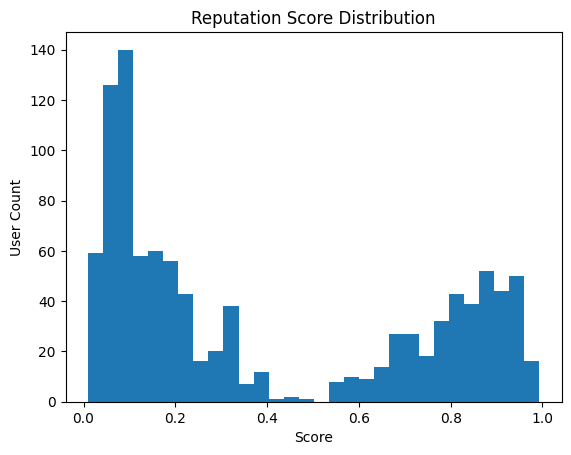

In [47]:
import matplotlib.pyplot as plt
plt.hist(reputation_scores.values(), bins=30)
plt.title("Reputation Score Distribution")
plt.xlabel("Score")
plt.ylabel("User Count")

In [48]:
print("Reputation Scores:", reputation_scores)
print("Trusted Neighbors:", trusted_neighbors_dict)

Reputation Scores: {1: 0.8181818181818182, 2: 0.6428571428571429, 3: 0.7, 4: 0.2692307692307692, 5: 0.375, 6: 0.26666666666666666, 7: 0.25, 8: 0.07142857142857142, 9: 0.1, 10: 0.034482758620689655, 11: 0.35714285714285715, 12: 0.1, 13: 0.045454545454545456, 14: 0.038461538461538464, 15: 0.02857142857142857, 16: 0.09803921568627451, 17: 0.9090909090909091, 18: 0.6428571428571429, 19: 0.7777777777777778, 20: 0.8955223880597015, 21: 0.9230769230769231, 22: 0.07142857142857142, 23: 0.10666666666666667, 24: 0.8301886792452831, 25: 0.18181818181818182, 26: 0.9142857142857143, 27: 0.07894736842105263, 28: 0.4, 29: 0.18181818181818182, 30: 0.9545454545454546, 31: 0.05555555555555555, 32: 0.2222222222222222, 33: 0.9047619047619048, 34: 0.6111111111111112, 35: 0.06666666666666667, 36: 0.1, 37: 0.07142857142857142, 38: 0.08333333333333333, 39: 0.8571428571428571, 40: 0.02564102564102564, 41: 0.8888888888888888, 42: 0.2222222222222222, 43: 0.21052631578947367, 44: 0.6666666666666666, 45: 0.8, 46: 

In [49]:
# Randomly select 5 keys and print their key-value pairs
random_keys = random.sample(list(reputation_scores.keys()), 5)

for key in random_keys:
    print(f"User ID: {key}, Reliability: {reputation_scores[key]}")

User ID: 334, Reliability: 0.8571428571428571
User ID: 981, Reliability: 0.1111111111111111
User ID: 95, Reliability: 0.16
User ID: 867, Reliability: 0.041666666666666664
User ID: 887, Reliability: 0.9333333333333333


In [50]:
# Randomly select 5 keys and print their key-value pairs
random_keys = random.sample(list(trusted_neighbors_dict.keys()), 5)

for key in random_keys:
    print(f"User ID: {key}, Trusted neighbours: {trusted_neighbors_dict[key]}")

User ID: 529, Trusted neighbours: [442, 61]
User ID: 668, Trusted neighbours: [387, 394, 147, 405, 791, 30, 820, 566, 575, 451, 967, 840, 77, 854, 477, 98, 613, 233, 234, 1011, 380]
User ID: 998, Trusted neighbours: [387, 394, 147, 405, 791, 30, 820, 566, 442, 451, 967, 840, 77, 854, 477, 98, 233, 234, 495, 1011, 380]
User ID: 887, Trusted neighbours: [514, 387, 394, 267, 147, 405, 791, 30, 820, 566, 61, 190, 575, 451, 967, 840, 77, 854, 477, 98, 613, 233, 234, 495, 1011, 380]
User ID: 444, Trusted neighbours: [442]


In [51]:
len(trusted_neighbors_dict)

1028

##B) Buliding trusted neighbors dict  

In [52]:

# Build trusted‑neighbor dicts for a list of reliability thresholds

reliability_thresholds = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

trusted_neighbors_by_threshold = {
    t: {
        user: select_trusted_neighbors(
            user,
            user_interactions,
            reputation_scores,
            news_user_map,
            threshold=t
        )
        for user in user_interactions
    }
    for t in reliability_thresholds
}

# Quick summary: average / total neighbors at each threshold

for t, nbr_dict in trusted_neighbors_by_threshold.items():
    counts = [len(v) for v in nbr_dict.values()]
    print(f"Threshold {t:0.2f}")
    print(f"  • Avg no. of  trusted neighbors  : {np.mean(counts):.2f}")
    print(f"  • Total no. trusted neighbors: {np.sum(counts)}\n")


Threshold 0.00
  • Avg no. of  trusted neighbors  : 415.72
  • Total no. trusted neighbors: 427358

Threshold 0.10
  • Avg no. of  trusted neighbors  : 289.31
  • Total no. trusted neighbors: 297412

Threshold 0.20
  • Avg no. of  trusted neighbors  : 212.46
  • Total no. trusted neighbors: 218414

Threshold 0.30
  • Avg no. of  trusted neighbors  : 169.53
  • Total no. trusted neighbors: 174279

Threshold 0.40
  • Avg no. of  trusted neighbors  : 143.59
  • Total no. trusted neighbors: 147607

Threshold 0.50
  • Avg no. of  trusted neighbors  : 140.07
  • Total no. trusted neighbors: 143990

Threshold 0.60
  • Avg no. of  trusted neighbors  : 133.04
  • Total no. trusted neighbors: 136764

Threshold 0.70
  • Avg no. of  trusted neighbors  : 114.52
  • Total no. trusted neighbors: 117726

Threshold 0.80
  • Avg no. of  trusted neighbors  : 84.63
  • Total no. trusted neighbors: 87003

Threshold 0.90
  • Avg no. of  trusted neighbors  : 38.45
  • Total no. trusted neighbors: 39529

Thre

In [53]:
#trusted_neighbors_dict = trusted_neighbors_by_threshold[0.4] # can pick each threshold dict

# Recommendation prediction

##Leave one out

In [54]:
train_data = {}  # {user_id: [list of news IDs for training]}
test_data = {}   # {user_id: held-out news ID for testing}

for user_id, interactions in user_interactions.items():
    train_data[user_id] = interactions[:]

In [55]:
train_data[1]

[{'news_id': 288, 'news_label': 'real'},
 {'news_id': 353, 'news_label': 'real'},
 {'news_id': 435, 'news_label': 'fake'},
 {'news_id': 184, 'news_label': 'real'},
 {'news_id': 416, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 439, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 3, 'news_label': 'fake'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 395, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 458, 'news_label': 'fake'}]

In [56]:
testset_df = testset.merge(news_df[['news_id', 'news_label']], on='news_id', how='left')
testset_df.head(2)

,user_id,news_id,rating,news_label
0,1,199,1,real
1,2,34,1,real


In [57]:
for index, row in testset_df.iterrows():
    test_data[row['user_id']] = {'news_id': row['news_id'],'news_label':row['news_label']}

In [58]:
test_data[1]

{'news_id': 199, 'news_label': 'real'}

In [59]:
len(test_data)

1028

##Negative sampling

In [60]:
def negative_sampling(user_interactions, news_embeddings, labels_dict, user_id, pos_news_ids, K=10):

    all_news = list(news_embeddings.keys())
    pos_set = set(pos_news_ids)
    available_news = list(set(all_news) - pos_set)

    fake_candidates = [nid for nid in available_news if labels_dict.get(nid) == 'fake']
    real_candidates = [nid for nid in available_news if labels_dict.get(nid) == 'real']


    fake_count = int(K * 0.7)
    real_count = K - fake_count

    negatives = []


    if fake_candidates:
        fake_sample_size = min(fake_count, len(fake_candidates))
        negatives.extend(random.sample(fake_candidates, fake_sample_size))


    if real_candidates:
        real_sample_size = min(real_count, len(real_candidates))
        negatives.extend(random.sample(real_candidates, real_sample_size))


    remaining = list(set(available_news) - set(negatives))
    while len(negatives) < K and remaining:
        negatives.append(remaining.pop(random.randint(0, len(remaining)-1)))

    return negatives[:K]

## Full Model

In [65]:
embed_dim = next(iter(news_embeddings.values())).shape[0]

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
from collections import defaultdict
import numpy as np
from sklearn.metrics import roc_auc_score
import time

def set_seed(seed=1):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(1)

class NewsAttention(nn.Module):
    def __init__(self, embed_dim, num_heads=4):
        super(NewsAttention, self).__init__()
        self.W = nn.Linear(embed_dim, num_heads)

    def forward(self, news_embeddings):
        attn_raw = self.W(news_embeddings)
        attn_weights = F.softmax(attn_raw, dim=0)
        headwise_user_emb = torch.einsum('nh,nd->hd', attn_weights, news_embeddings)
        user_embedding = headwise_user_emb.mean(dim=0)
        return user_embedding, attn_weights

class NeighborAggregation(nn.Module):
    def __init__(self, embed_dim):
        super(NeighborAggregation, self).__init__()
        self.W = nn.Linear(embed_dim, 1)

    def forward(self, neighbor_embeddings):
        attention_scores = self.W(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=0)
        neighbor_embedding = torch.sum(neighbor_embeddings * attention_weights.unsqueeze(-1), dim=0)
        return neighbor_embedding, attention_weights

class UserMLP(nn.Module):
    def __init__(self, embed_dim, dropout_rate=0.2):
        super(UserMLP, self).__init__()
        self.fc1 = nn.Linear(2 * embed_dim, embed_dim)
        self.fc2 = nn.Linear(embed_dim, embed_dim)
        self.fc3 = nn.Linear(embed_dim, embed_dim)
        self.fc4 = nn.Linear(embed_dim, embed_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, news_embedding, neighbor_embedding):
        combined = torch.cat((news_embedding, neighbor_embedding), dim=0)
        g1 = F.relu(self.fc1(combined))
        g1 = self.dropout(g1)
        g2 = F.relu(self.fc2(g1))
        g2 = self.dropout(g2)
        g3 = F.relu(self.fc3(g2))
        g3 = self.dropout(g3)
        h_i = self.fc4(g3)
        return h_i


class ScoringLayer(nn.Module):
    def __init__(self, embed_dim):
        super(ScoringLayer, self).__init__()
        self.fc1 = nn.Linear(embed_dim, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, user_embedding, news_embedding):
        x = user_embedding * news_embedding
        x = F.relu(self.fc1(x))
        return self.fc2(x).squeeze()


class EndToEndRecommendationModel(nn.Module):
    def __init__(self, embed_dim, news_embeddings, user_interactions, trusted_neighbors_dict):
        super(EndToEndRecommendationModel, self).__init__()
        self.news_embeddings = news_embeddings
        self.user_interactions = user_interactions
        self.trusted_neighbors_dict = trusted_neighbors_dict

        self.news_attention = NewsAttention(embed_dim)
        self.neighbor_attention = NeighborAggregation(embed_dim)
        self.user_mlp = UserMLP(embed_dim)
        self.scoring = ScoringLayer(embed_dim)

        self.cached_hiN = {}
        self.cached_hiS = {}
        self.cached_user_embeddings = {}

    def get_user_news_embeddings(self, user_id):
        news_ids = [x['news_id'] for x in self.user_interactions[user_id]]
        return torch.stack([self.news_embeddings[nid] for nid in news_ids[:50]])

    def get_neighbor_embeddings(self, user_id):
        neighbors = self.trusted_neighbors_dict.get(user_id, [])
        embeddings = []
        for nid in neighbors:
            if nid in self.cached_hiN:
                embeddings.append(self.cached_hiN[nid])
            elif nid in self.user_interactions:
                news_embs = self.get_user_news_embeddings(nid)
                emb = self.news_attention(news_embs)[0]
                embeddings.append(emb)
        if embeddings:
            return torch.stack(embeddings)
        else:
            return torch.zeros((1, next(iter(self.news_embeddings.values())).shape[0]))

    def forward(self, user_id, candidate_news_id):
        if user_id not in self.cached_user_embeddings:
            user_news_embs = self.get_user_news_embeddings(user_id)
            hiN, _ = self.news_attention(user_news_embs)
            self.cached_hiN[user_id] = hiN

            neighbor_embs = self.get_neighbor_embeddings(user_id)
            hiS, _ = self.neighbor_attention(neighbor_embs)
            self.cached_hiS[user_id] = hiS

            user_emb = self.user_mlp(hiN, hiS)
            self.cached_user_embeddings[user_id] = user_emb
        else:
            user_emb = self.cached_user_embeddings[user_id]

        news_emb = self.news_embeddings[candidate_news_id]
        return self.scoring(user_emb, news_emb)


In [67]:
def train_model(model, train_data, news_embeddings, labels_dict, epochs=10, K=10, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        total_loss = 0
        model.train()

        for i, (user_id, interactions) in enumerate(train_data.items()):
            model.cached_hiN.clear()
            model.cached_hiS.clear()
            model.cached_user_embeddings.clear()

            pos_news_ids = [x['news_id'] for x in interactions]
            pos_scores = torch.stack([model(user_id, nid) for nid in pos_news_ids])

            neg_news_ids = negative_sampling(
                train_data, news_embeddings, labels_dict,
                user_id, pos_news_ids, K
            )

            neg_scores = torch.stack([model(user_id, nid) for nid in neg_news_ids])


            pos_scores_expanded = pos_scores.unsqueeze(1)
            neg_scores_expanded = neg_scores.unsqueeze(0).expand(len(pos_scores), -1)
            all_scores = torch.cat([pos_scores_expanded, neg_scores_expanded], dim=1)
            exp_scores = torch.exp(all_scores)
            pi = exp_scores[:, 0] / torch.sum(exp_scores, dim=1)

            user_loss = -torch.sum(torch.log(pi)) / len(pos_news_ids)

            optimizer.zero_grad()
            user_loss.backward()
            optimizer.step()
            total_loss += user_loss.item()

        print(f"Epoch {epoch+1} Loss: {total_loss / len(train_data):.4f}")

In [68]:
def evaluate_model(model, test_data, news_embeddings, labels_dict, K=10):

    model.eval()
    model.cached_hiN.clear()
    model.cached_hiS.clear()
    model.cached_user_embeddings.clear()

    reciprocal_ranks = []
    tf_at_k = 0

    with torch.no_grad():
        for user_id, test_interaction in test_data.items():
            test_news_id = test_interaction['news_id']

            # Get scores for all news
            news_scores = {nid: model(user_id, nid).item() for nid in news_embeddings}
            sorted_news = sorted(news_scores, key=news_scores.get, reverse=True)

            # Calculate MRR
            rank = sorted_news.index(test_news_id) + 1
            reciprocal_ranks.append(1 / rank)

            # Calculate TF@K
            top_k_news = sorted_news[:K]
            fake_news_count = sum(1 for nid in top_k_news if labels_dict[nid] == 'fake')
            tf_at_k += fake_news_count / K

    mrr = np.mean(reciprocal_ranks)
    tf_at_k = tf_at_k / len(test_data)

    return mrr, tf_at_k

## Evaluation on varying thresholds

In [69]:
### Threshold = 0.2
trusted_neighbors_dict = trusted_neighbors_by_threshold[0.2] # can pick each threshold dict

total_neighbours = np.sum([len(v) for v in trusted_neighbors_dict.values()])

model = EndToEndRecommendationModel(
    embed_dim=embed_dim,
    news_embeddings=news_embeddings,
    user_interactions=user_interactions,
    trusted_neighbors_dict=trusted_neighbors_dict
)

#subset_train_data = dict(list(train_data.items())[:50])  # subset data

train_data = dict(list(train_data.items())[:])   # full data

train_model(model, train_data, news_embeddings, labels_dict, epochs=15)

test_data = dict(list(test_data.items())[:]) # full data

mrr, tf_at_k = evaluate_model(
    model=model,
    test_data=test_data,
    news_embeddings=news_embeddings,
    labels_dict=labels_dict,
    K=10
)
print(f"MRR: {mrr:.4f}")
print(f"TF: {tf_at_k:.4f}")


Epoch 1 Loss: 2.2258
Epoch 2 Loss: 1.9779
Epoch 3 Loss: 1.8371
Epoch 4 Loss: 1.7836
Epoch 5 Loss: 1.7401
Epoch 6 Loss: 1.7330
Epoch 7 Loss: 1.6747
Epoch 8 Loss: 1.6654
Epoch 9 Loss: 1.6455
Epoch 10 Loss: 1.5933
Epoch 11 Loss: 1.6023
Epoch 12 Loss: 1.6014
Epoch 13 Loss: 1.5564
Epoch 14 Loss: 1.5694
Epoch 15 Loss: 1.5526
MRR: 0.0772
TF: 0.6512


In [72]:
### Threshold = 0.5
trusted_neighbors_dict = trusted_neighbors_by_threshold[0.5] # can pick each threshold dict

total_neighbours = np.sum([len(v) for v in trusted_neighbors_dict.values()])

model = EndToEndRecommendationModel(
    embed_dim=embed_dim,
    news_embeddings=news_embeddings,
    user_interactions=user_interactions,
    trusted_neighbors_dict=trusted_neighbors_dict
)

#subset_train_data = dict(list(train_data.items())[:50])  # subset data

train_data = dict(list(train_data.items())[:])   # full data

train_model(model, train_data, news_embeddings, labels_dict, epochs=15)

test_data = dict(list(test_data.items())[:]) # full data

mrr, tf_at_k = evaluate_model(
    model=model,
    test_data=test_data,
    news_embeddings=news_embeddings,
    labels_dict=labels_dict,
    K=10
)
print(f"MRR: {mrr:.4f}")
print(f"TF: {tf_at_k:.4f}")

Epoch 1 Loss: 2.2295
Epoch 2 Loss: 1.9979
Epoch 3 Loss: 1.8471
Epoch 4 Loss: 1.7719
Epoch 5 Loss: 1.7196
Epoch 6 Loss: 1.7120
Epoch 7 Loss: 1.6737
Epoch 8 Loss: 1.6528
Epoch 9 Loss: 1.6363
Epoch 10 Loss: 1.5809
Epoch 11 Loss: 1.5870
Epoch 12 Loss: 1.5866
Epoch 13 Loss: 1.5460
Epoch 14 Loss: 1.5552
Epoch 15 Loss: 1.5400
MRR: 0.1001
TF: 0.5866


In [74]:
### Threshold = 0.8
trusted_neighbors_dict = trusted_neighbors_by_threshold[0.8] # can pick each threshold dict

total_neighbours = np.sum([len(v) for v in trusted_neighbors_dict.values()])

model = EndToEndRecommendationModel(
    embed_dim=embed_dim,
    news_embeddings=news_embeddings,
    user_interactions=user_interactions,
    trusted_neighbors_dict=trusted_neighbors_dict
)

#subset_train_data = dict(list(train_data.items())[:50])  # subset data

train_data = dict(list(train_data.items())[:])   # full data

train_model(model, train_data, news_embeddings, labels_dict, epochs=15)

test_data = dict(list(test_data.items())[:]) # full data

mrr, tf_at_k = evaluate_model(
    model=model,
    test_data=test_data,
    news_embeddings=news_embeddings,
    labels_dict=labels_dict,
    K=10
)
print(f"MRR: {mrr:.4f}")
print(f"TF: {tf_at_k:.4f}")

Epoch 1 Loss: 2.2355
Epoch 2 Loss: 2.0310
Epoch 3 Loss: 1.8550
Epoch 4 Loss: 1.7954
Epoch 5 Loss: 1.7616
Epoch 6 Loss: 1.7261
Epoch 7 Loss: 1.6921
Epoch 8 Loss: 1.6396
Epoch 9 Loss: 1.5974
Epoch 10 Loss: 1.6142
Epoch 11 Loss: 1.5838
Epoch 12 Loss: 1.5607
Epoch 13 Loss: 1.5642
Epoch 14 Loss: 1.5274
Epoch 15 Loss: 1.5582
MRR: 0.0715
TF: 0.6067


--------------------------------------------------------------------------